# Import Packages to Run Graphics

In [107]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt
import seaborn as sns
import base64
import io
import codecs
from scipy.misc import imread
from subprocess import check_output

# Read in Data

In [108]:
data= pd.read_csv('C:\\Users\\benjc\\OneDrive\\Personal Development\\Live Oak Bank\\Marvel-DC.csv')
data.head()

,Movie,Rotten_Tomatoes_Score,Audience_Review_Score,Year,BOS_Worldwide,BOS_Domestic,BOS_International,Marvel_DC,Production_Budget,ROI
0,Thor: Ragnarok,92,88,2017,849929707,314334584,535595123,Marvel,180000000,3.721832
1,Spider-Man: Homecoming,92,88,2017,880166924,334201140,545965784,Marvel,175000000,4.029525
2,Guardian of the Galaxy Vol. 2,83,88,2017,863756051,389813101,473942950,Marvel,200000000,3.318780
3,Doctor Strange,90,86,2016,677718395,232641920,445076475,Marvel,165000000,3.107384
4,Captain America: Civil War,91,89,2016,1153304495,408084349,745220146,Marvel,250000000,3.613218


# Explore and Clean Data

In [110]:
#if we had data we need to clean, and wanted to drop things say based off a certain year
#data.isnull().sum()
#data.drop(data.index[],inplace=True)
data.dtypes #understand the types in our data set

Movie                     object
Rotten_Tomatoes_Score      int64
Audience_Review_Score      int64
Year                       int64
BOS_Worldwide              int64
BOS_Domestic               int64
BOS_International          int64
Marvel_DC                 object
Production_Budget          int64
ROI                      float64
dtype: object

Create new variable names and splitting Marvel and DC

In [111]:
Marvel = []
for row in data['Marvel_DC']:
    if row =='Marvel':
        Marvel.append('yes')
    else:
        Marvel.append('no')
data['Marvel'] = Marvel

DC = []
for row in data['Marvel_DC']:
    if row =='DC':
        DC.append('yes')
    else:
        DC.append('no')
data['DC'] = DC
data.head()

,Movie,Rotten_Tomatoes_Score,Audience_Review_Score,Year,BOS_Worldwide,BOS_Domestic,BOS_International,Marvel_DC,Production_Budget,ROI,Marvel,DC
0,Thor: Ragnarok,92,88,2017,849929707,314334584,535595123,Marvel,180000000,3.721832,yes,no
1,Spider-Man: Homecoming,92,88,2017,880166924,334201140,545965784,Marvel,175000000,4.029525,yes,no
2,Guardian of the Galaxy Vol. 2,83,88,2017,863756051,389813101,473942950,Marvel,200000000,3.318780,yes,no
3,Doctor Strange,90,86,2016,677718395,232641920,445076475,Marvel,165000000,3.107384,yes,no
4,Captain America: Civil War,91,89,2016,1153304495,408084349,745220146,Marvel,250000000,3.613218,yes,no


# Plotting Data

In [ ]:
Understand Counts Over Time

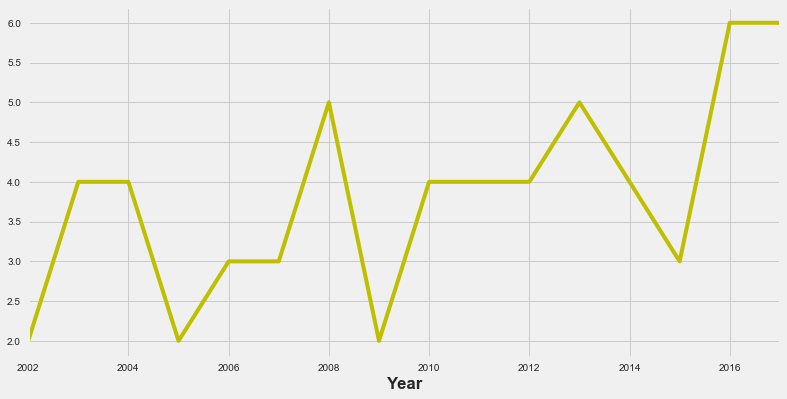

In [112]:
#Counts of movies over the last 15 years for both Marvel and DC
data.groupby('Year')['Marvel_DC'].count().plot(color='y')
fig=plt.gcf()
fig.set_size_inches(12,6)
plt.show()

In [ ]:
Distribution of Data by counts

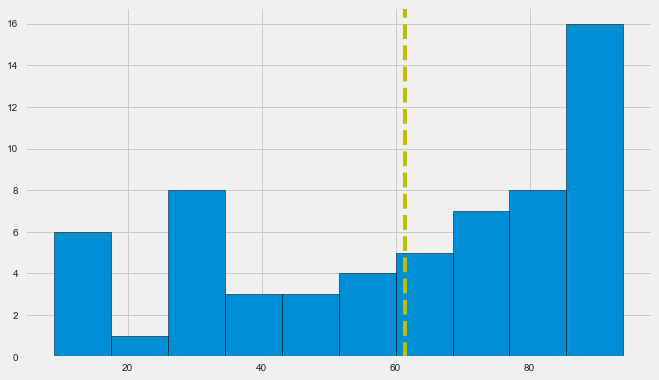

In [113]:
#Distribution of Rotten Tomatoes Score and Movie Counts, dashed line is average score
data['Rotten_Tomatoes_Score'].hist(edgecolor='black')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axvline(data['Rotten_Tomatoes_Score'].mean(),color='y',linestyle='dashed')
plt.show()

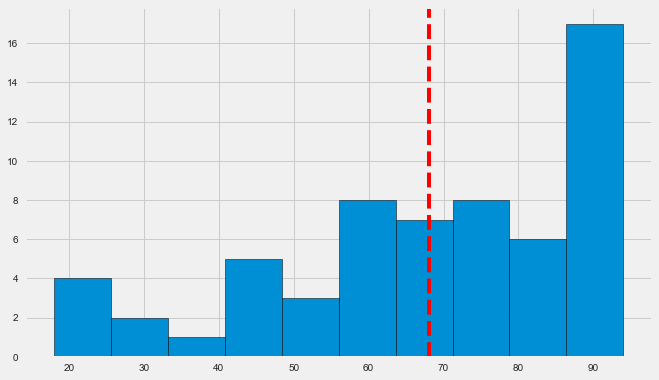

In [114]:
#Distribution of Audience Review Score and Movie Counts, dashed line is average score
data['Audience_Review_Score'].hist(edgecolor='black')
fig=plt.gcf()
fig.set_size_inches(10,6)
plt.axvline(data['Audience_Review_Score'].mean(),color='r',linestyle='dashed')
plt.show()

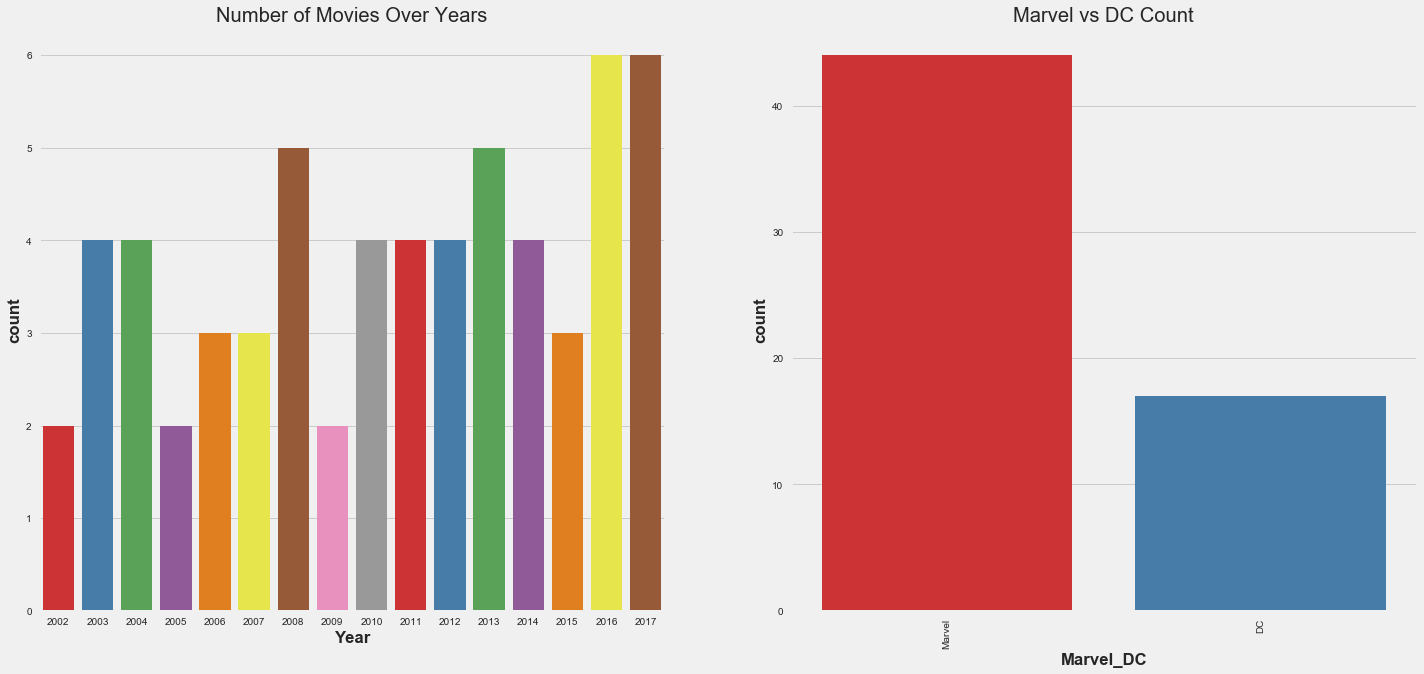

In [115]:
#continued count, per year and Marvel vs DC
fig,ax=plt.subplots(1,2,figsize=(22,10))
sns.countplot(data['Year'],ax=ax[0],palette='Set1').set_title('Number of Movies Over Years')
plt.ylabel('')
sns.countplot(data['Marvel_DC'],ax=ax[1],palette='Set1').set_title('Marvel vs DC Count')
plt.xticks(rotation=90)
plt.show()

# Understand the Average Score Over Years
      Variance within groups and between groups for Marvel and DC

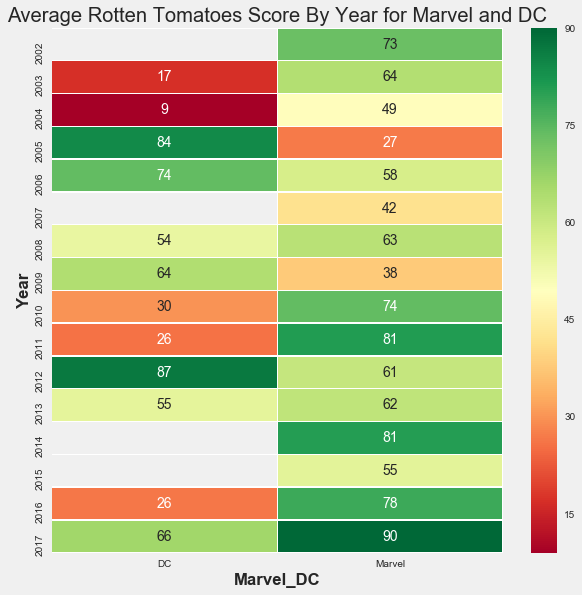

In [116]:
#Average Rotten Tomatoes Score year over year for DC and Marvel
fig, ax = plt.subplots(figsize=(9,9)) 
abc=data.groupby(['Year','Marvel_DC'])['Rotten_Tomatoes_Score'].mean().reset_index()
abc=abc.pivot('Year','Marvel_DC','Rotten_Tomatoes_Score')
sns.heatmap(abc,annot=True,cmap='RdYlGn',linewidths=0.4, ax=ax)
plt.title('Average Rotten Tomatoes Score By Year for Marvel and DC')
plt.show()
#Marvel beat DC twice as much comparing across years 8 vs 4

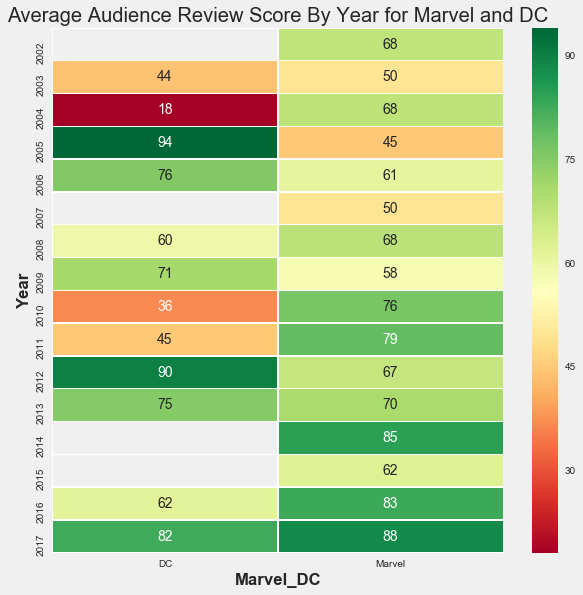

In [117]:
#Same but for Audience score
fig, ax = plt.subplots(figsize=(9,9)) 
xyz=data.groupby(['Year','Marvel_DC'])['Audience_Review_Score'].mean().reset_index()
xyz=xyz.pivot('Year','Marvel_DC','Audience_Review_Score')
sns.heatmap(xyz,annot=True,cmap='RdYlGn',linewidths=0.4, ax=ax)
plt.title('Average Audience Review Score By Year for Marvel and DC')
plt.show()
#7 vs 5

# ANOVA

Rotton Tomatoes Score Marvel vs DC

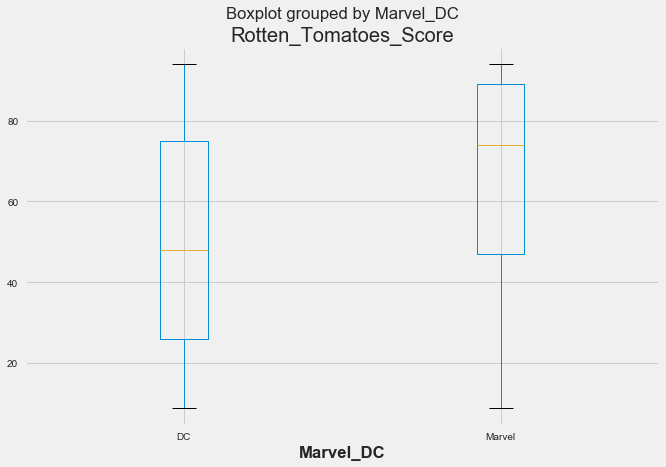

In [118]:
data.boxplot('Rotten_Tomatoes_Score', by='Marvel_DC', figsize=(11, 7))
plt.show()

One-Way Anova Part 1

In [119]:
grps = pd.unique(data.Marvel_DC.values)
d_data = {grp:data['Rotten_Tomatoes_Score'][data.Marvel_DC == grp] for grp in grps}
k = len(pd.unique(data.Marvel_DC))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('Marvel_DC').size()[0] #Participants in each condition

from scipy import stats
 
F, p = stats.f_oneway(d_data['Marvel'], d_data['DC'])

F, p

(4.5762807666685488, 0.036565867855759125)

One-Way Anova Part 2

In [120]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('Rotten_Tomatoes_Score ~ Marvel_DC',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                 sum_sq    df         F    PR(>F)
Marvel_DC   3284.530639   1.0  4.576281  0.036566
Residual   42346.026738  59.0       NaN       NaN


Audience Review Score Marvel vs DC

Boxplot

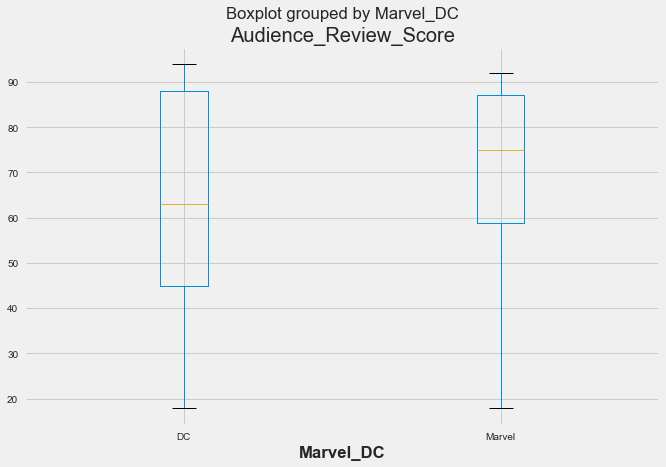

In [121]:
data.boxplot('Audience_Review_Score', by='Marvel_DC', figsize=(11, 7))
plt.show()

One-Way Anova Part 1

In [122]:
grps = pd.unique(data.Marvel_DC.values)
d_data = {grp:data['Audience_Review_Score'][data.Marvel_DC == grp] for grp in grps}
k = len(pd.unique(data.Marvel_DC))  # number of conditions
N = len(data.values)  # conditions times participants
n = data.groupby('Marvel_DC').size()[0] #Participants in each condition

from scipy import stats
 
F, p = stats.f_oneway(d_data['Marvel'], d_data['DC'])

F, p

(1.435735023064419, 0.23562191786080044)

One-Way Anova Part 2

In [100]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
 
mod = ols('Audience_Review_Score ~ Marvel_DC',
                data=data).fit()
                
aov_table = sm.stats.anova_lm(mod, typ=2)
print (aov_table)

                 sum_sq    df         F    PR(>F)
Marvel_DC    655.757430   1.0  1.435735  0.235622
Residual   26947.652406  59.0       NaN       NaN


# Distribution of Movies for Box Office Sales Worldwide | Domestic | International, Production Budget, ROI

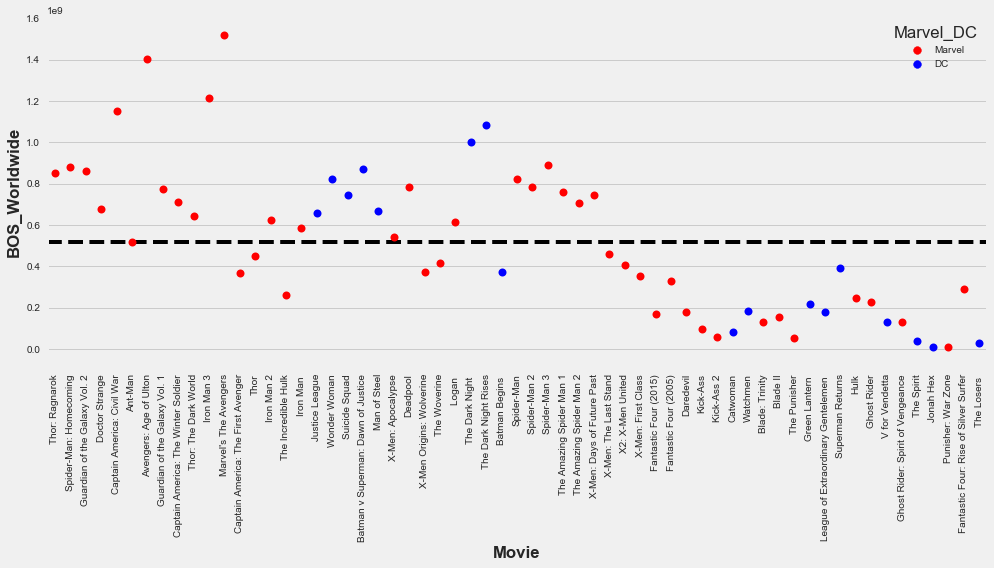

In [123]:
#Plotting BOS Worldwide using a swarm map based off movie
plt.subplots(figsize=(15,6))
sns.swarmplot(x='Movie',y='BOS_Worldwide',hue="Marvel_DC", data=data, palette=dict(Marvel = 'r', DC = 'b'), size=8)
plt.axhline(data['BOS_Worldwide'].mean(),linestyle='dashed',color='black')
plt.rcParams["axes.labelweight"] = "bold"
plt.xticks(rotation=90)
plt.show()

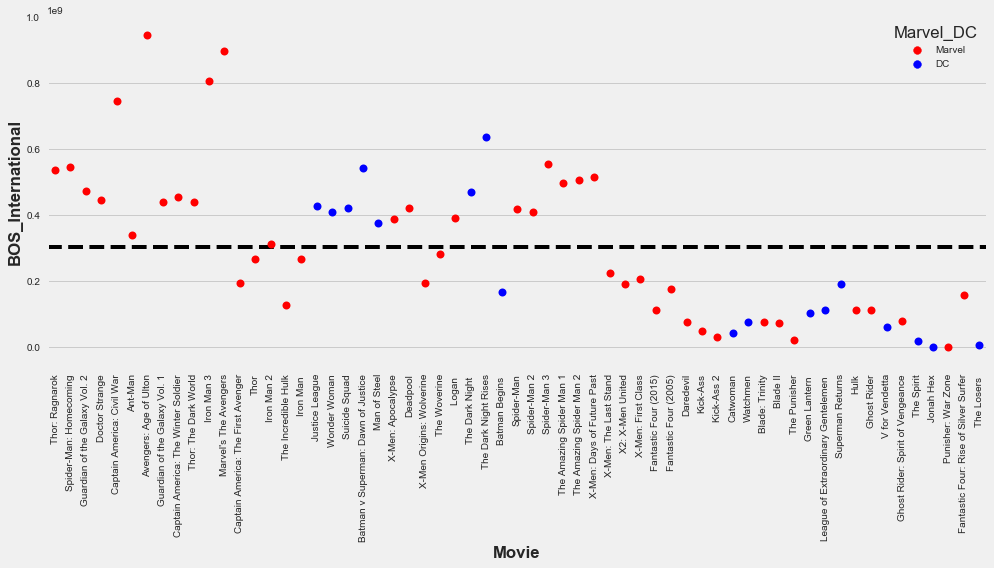

In [103]:
#Plotting ROI using a swarm map based off movie
plt.subplots(figsize=(15,6))
sns.swarmplot(x='Movie',y='BOS_International',hue="Marvel_DC", data=data,palette=dict(Marvel = 'r', DC = 'b'), size=8)
plt.axhline(data['BOS_International'].mean(),linestyle='dashed',color='black')
plt.rcParams["axes.labelweight"] = "bold"
plt.xticks(rotation=90)
plt.show()

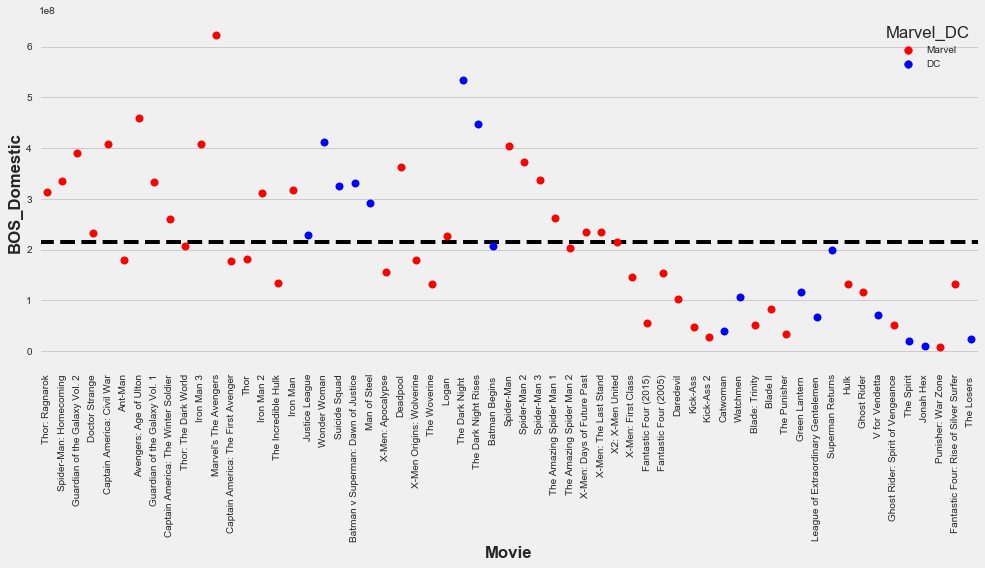

In [124]:
#Plotting ROI using a swarm map based off movie
plt.subplots(figsize=(15,6))
sns.swarmplot(x='Movie',y='BOS_Domestic',hue="Marvel_DC", data=data,palette=dict(Marvel = 'r', DC = 'b'), size=8)
plt.axhline(data['BOS_Domestic'].mean(),linestyle='dashed',color='black')
plt.rcParams["axes.labelweight"] = "bold"
plt.xticks(rotation=90)
plt.show()

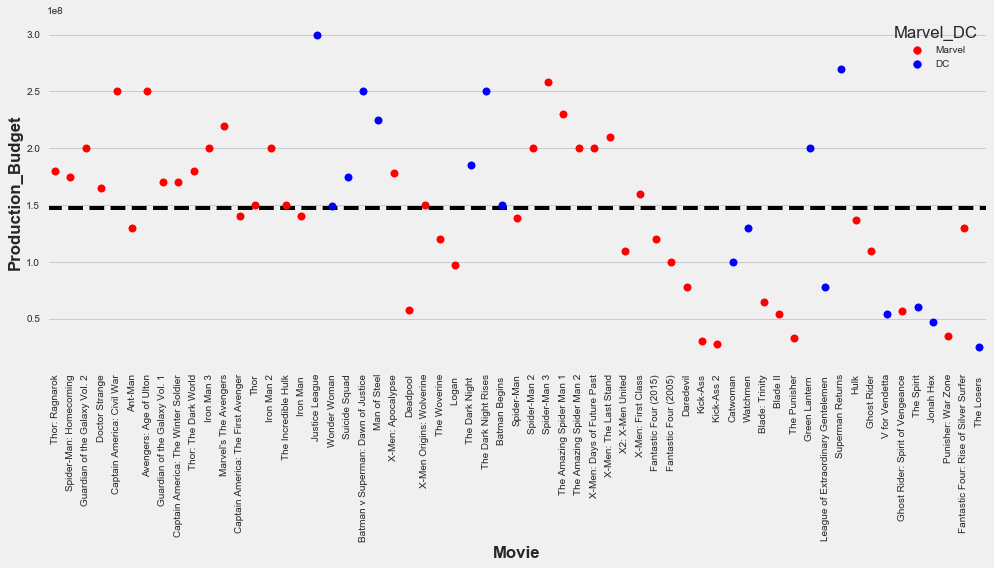

In [105]:
#Plotting Production Budget using a swarm map based off movie
plt.subplots(figsize=(15,6))
sns.swarmplot(x='Movie',y='Production_Budget',hue="Marvel_DC", data=data,palette=dict(Marvel = 'r', DC = 'b'), size=8)
plt.axhline(data['Production_Budget'].mean(),linestyle='dashed',color='black')
plt.rcParams["axes.labelweight"] = "bold"
plt.xticks(rotation=90)
plt.show()

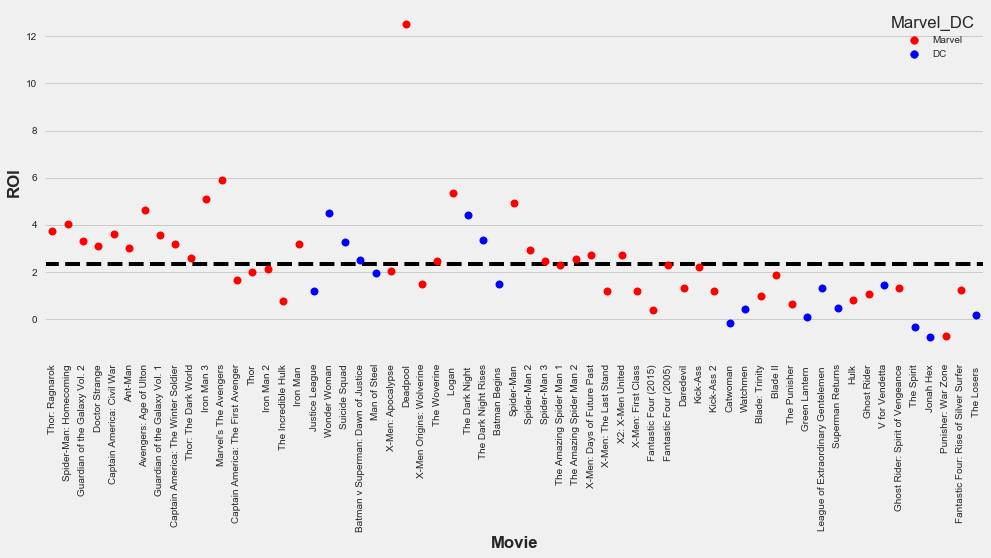

In [126]:
#Plotting ROI using a swarm map based off movie
plt.subplots(figsize=(15,6))
sns.swarmplot(x='Movie',y='ROI',hue="Marvel_DC", data=data,palette=dict(Marvel = 'r', DC = 'b'), size=8)
plt.axhline(data['ROI'].mean(),linestyle='dashed',color='black')
plt.rcParams["axes.labelweight"] = "bold"
plt.xticks(rotation=90)
plt.show()